<a href="https://colab.research.google.com/github/GrishkaYesenin/WSDM---KKBox-s-Music-Recommendation-Challenge/blob/main/Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### WSDM - KKBox's Music Recommendation Challenge

# Exploratory data analysis

In [7]:
#Importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')
!unzip /content/drive/MyDrive/kkbox-music-recommendation-challenge.zip

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Archive:  /content/drive/MyDrive/kkbox-music-recommendation-challenge.zip
replace members.csv.7z? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Unzipping 7z files
!7z e train.csv.7z

!7z e members.csv.7z

!7z e song_extra_info.csv.7z

!7z e songs.csv.7z

!7z e test.csv.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 106420688 bytes (102 MiB)

Extracting archive: train.csv.7z
--
Path = train.csv.7z
Type = 7z
Physical Size = 106420688
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%    
Would you like to replace the existing file:
  Path:     ./train.csv
  Size:     971675848 bytes (927 MiB)
  Modified: 2017-09-22 00:08:34
with the file from archive:
  Path:     train.csv
  Size:     971675848 bytes (927 MiB)
  Modified: 2017-09-22 00:08:34
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? 
7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scan

In [ ]:
#loading dataset

train = pd.read_csv("train.csv")
songs = pd.read_csv("songs.csv")
members = pd.read_csv("members.csv")
song_info = pd.read_csv("song_extra_info.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1


In [ ]:
songs.head(3)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0


In [ ]:
members.head(3)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712


In [ ]:
song_info.head(3)

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303


In [ ]:
#Combining all datasets
data1 = pd.merge(train,songs,on='song_id', how='left')
data2 = pd.merge(data1,song_info,on='song_id', how='left')
data =  pd.merge(data2,members,on='msno', how='left')
del data1,data2

In [ ]:
#Final detaset
data.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911


In [ ]:
data.shape

(7377418, 20)

In [ ]:
#Checking for columns and their datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  name                    object 
 13  isrc                    object 
 14  city                    int64  
 15  bd                      int64  
 16  gender                  object 
 17  registered_via          int64  
 18  registration_init_time  int64  
 19  expiration_date         int64  
dtypes: float64(2), int64(6), object(12)
memory usage: 1.1+ GB


In [ ]:
#Checking missing values
data.isnull().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
song_length                   114
genre_ids                  118455
artist_name                   114
composer                  1675706
lyricist                  3178812
language                      150
name                         1457
isrc                       577858
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

There is lot of data missing. Let us calculate % of data missing in each columns

In [ ]:
#Calculating % of data missing
((data.isnull().sum()/len(data))*100).sort_values(ascending=False)

lyricist                  43.088408
gender                    40.142486
composer                  22.713990
isrc                       7.832795
source_screen_name         5.622618
genre_ids                  1.605643
source_system_tab          0.336825
source_type                0.291959
name                       0.019749
language                   0.002033
song_length                0.001545
artist_name                0.001545
bd                         0.000000
registration_init_time     0.000000
registered_via             0.000000
msno                       0.000000
city                       0.000000
song_id                    0.000000
target                     0.000000
expiration_date            0.000000
dtype: float64

Percentage of missing values is high in columns "lyricst","gender" and "composer", however it is not ideal to drop these columns as this data is crucial in identifying taste of individuals in songs and indirectly will help us predict if the song will be replayed.

We shall follow the following steps to remove null values:
- missing data in numerical columns will be replaced by its corresponding median values.
- in other columns we shall replace null values by "Unknown"

In [ ]:
#Extracting non-numeric columns
data.select_dtypes(include="object").columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'genre_ids', 'artist_name', 'composer', 'lyricist',
       'name', 'isrc', 'gender'],
      dtype='object')

In [ ]:
#Replacing missing values in non-numeric columns with 'unknown'
cols_obj = data.select_dtypes(include="object").columns
data[cols_obj]=data[cols_obj].fillna(value='unknown')

In [ ]:
#Extracting numeric columns
cols_num = data.select_dtypes(include="number").columns

In [ ]:
#Replacing missing values in numeric columns with respective median
for col in cols_num:
    data[col]=data[col].fillna(value= data[col].median())

In [ ]:
#Rechecking for missing data
data.isnull().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
name                      0
isrc                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [ ]:
#Checking for Duplicates
data.duplicated().sum()

0

#### Extracting date

In [ ]:
#Converting date columns to datetime format and extracting details
data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format = "%Y%m%d")

data['registration_init_year'] = data['registration_init_time'].dt.year
data['registration_init_month'] = data['registration_init_time'].dt.month
data['registration_init_date'] = data['registration_init_time'].dt.day

In [ ]:
data['expiration_date'] = pd.to_datetime(data['expiration_date'], format = "%Y%m%d")

data['expiration_date_year'] = data['expiration_date'].dt.year
data['expiration_date_month'] = data['expiration_date'].dt.month
data['expiration_date_date'] = data['expiration_date'].dt.day

In [ ]:
#Dropping registration_init_time and expiration_date column as features have been extracted
data.drop(['registration_init_time', 'expiration_date'], axis=1, inplace=True)

In [ ]:
data.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,city,bd,gender,registered_via,registration_init_year,registration_init_month,registration_init_date,expiration_date_year,expiration_date_month,expiration_date_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,...,1,0,unknown,7,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,unknown,...,13,24,female,9,2011,5,25,2017,9,11


#### Encoding

In [ ]:
#Extracting non-numeric columns for encoding
cols_cat= data.select_dtypes(include='object').columns
cols_cat

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'genre_ids', 'artist_name', 'composer', 'lyricist',
       'name', 'isrc', 'gender'],
      dtype='object')

In [ ]:
#Applying Laber Encoder
le = LabelEncoder()
data[cols_cat] = data[cols_cat].apply(le.fit_transform)

In [ ]:
data.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,city,bd,gender,registered_via,registration_init_year,registration_init_month,registration_init_date,expiration_date_year,expiration_date_month,expiration_date_date
0,8158,74679,1,7,6,1,206471.0,285,3277,14581,...,1,0,2,7,2012,1,2,2017,10,5
1,17259,223479,3,8,4,1,284584.0,90,31960,64996,...,13,24,0,9,2011,5,25,2017,9,11
2,17259,120758,3,8,4,1,225396.0,90,21372,45057,...,13,24,0,9,2011,5,25,2017,9,11


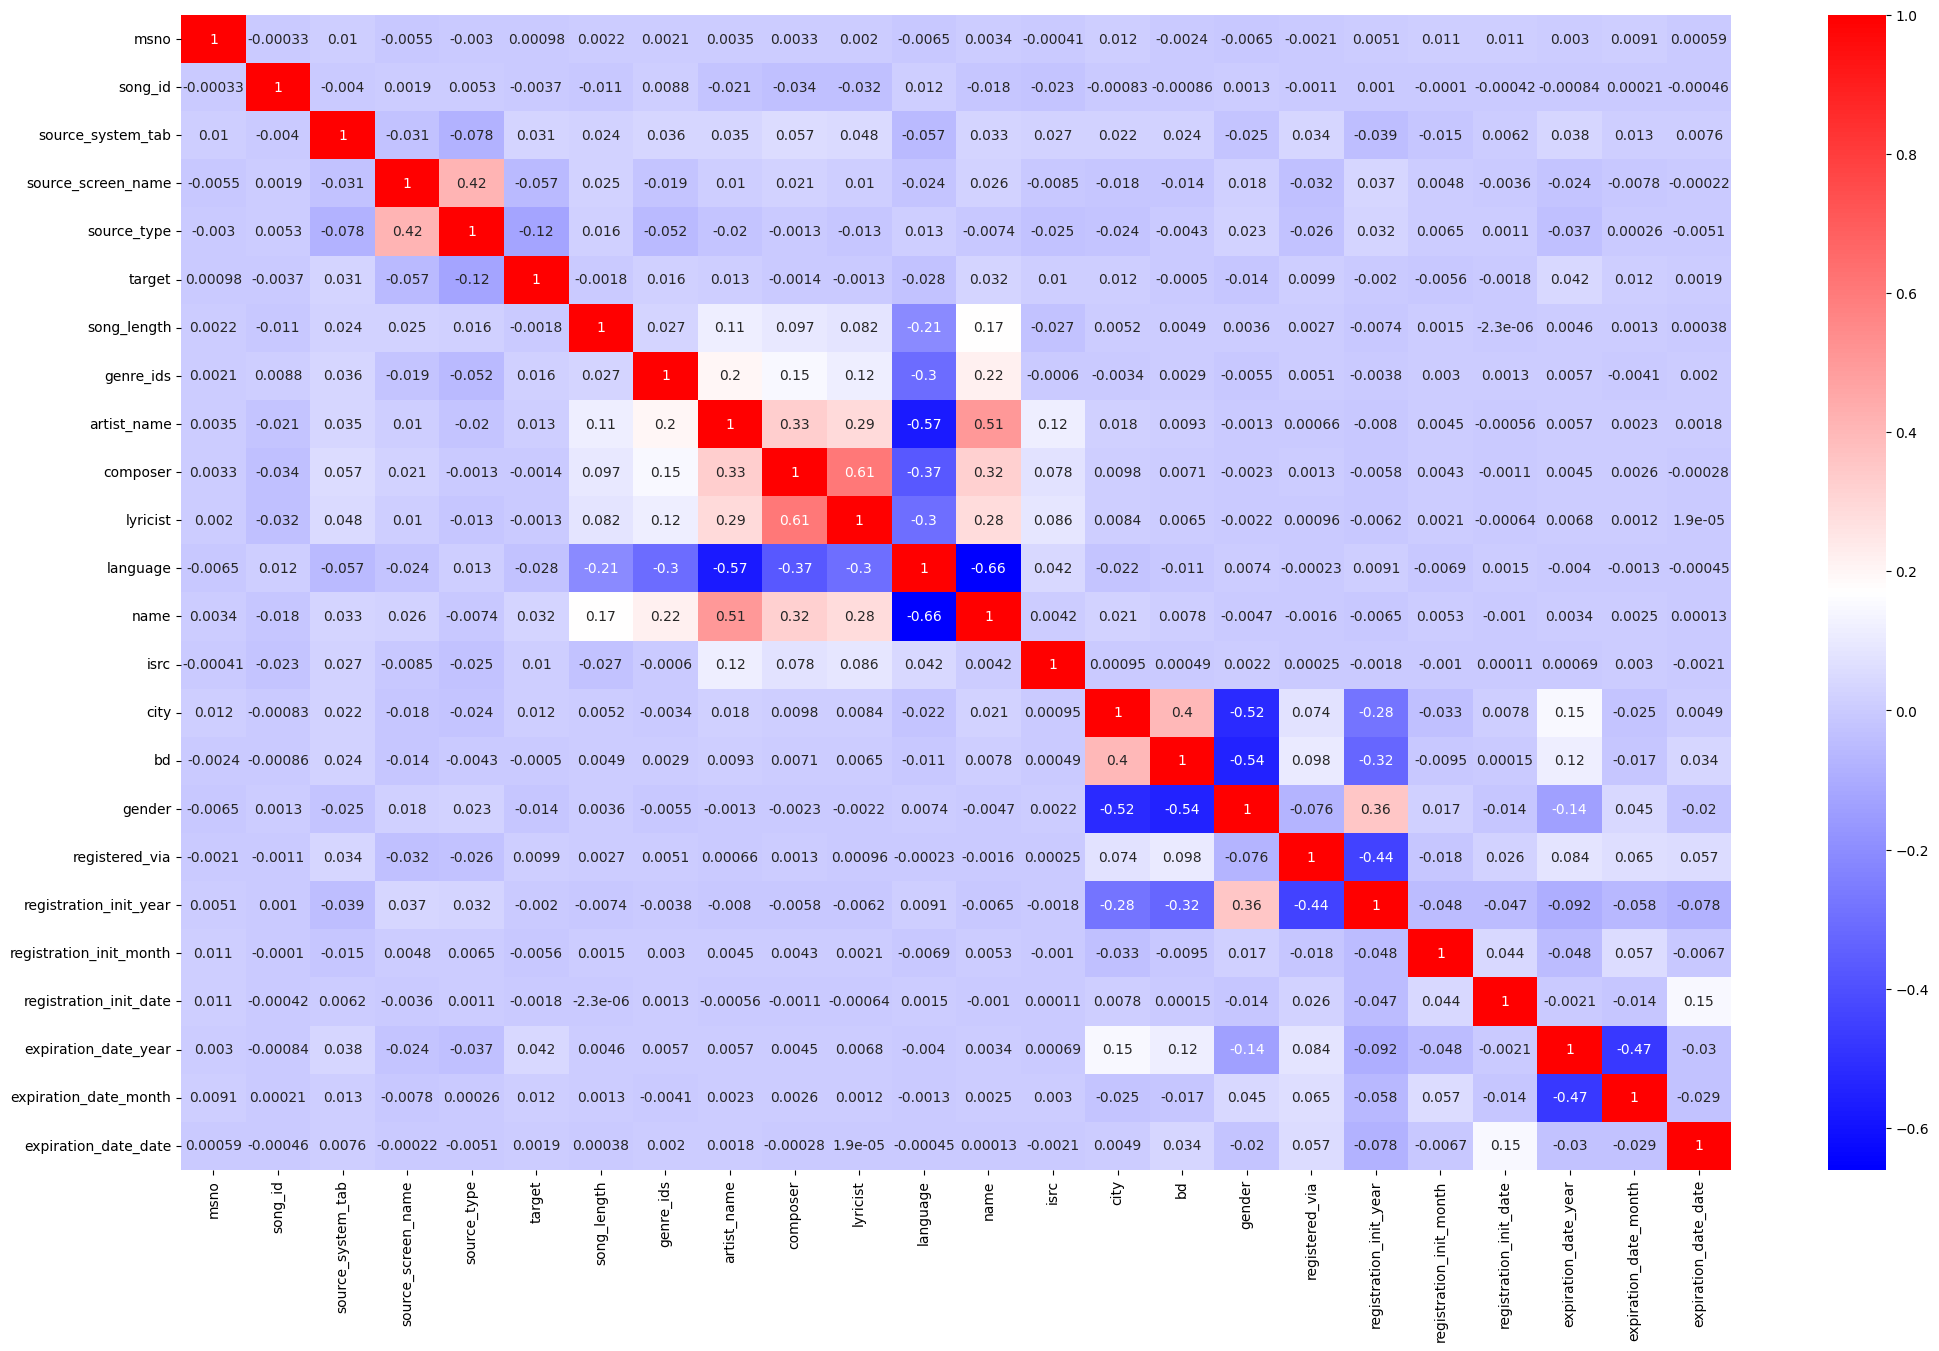

In [ ]:
#Checking heatmap and correlation among columns
plt.figure(figsize=(25,15))
corr = data.corr()
sns.heatmap(corr,cmap = 'bwr', annot=True)
plt.show()

In [ ]:
data.to_csv('prepared_data.csv', index=False)

In [ ]:
!wget -P /content/drive/My\ Drive /content/prepared_data.csv

--2024-04-27 10:35:13--  http://prepared_data.csv/
Resolving prepared_data.csv (prepared_data.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘prepared_data.csv’


In [13]:
from google.colab import drive

drive.mount('/content/drive/')
data = pd.read_csv("/content/drive/MyDrive/prepared_data.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
#Splitting input and output columns
X = data.drop("target",axis=1)
y = data.target

In [15]:
data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,city,bd,gender,registered_via,registration_init_year,registration_init_month,registration_init_date,expiration_date_year,expiration_date_month,expiration_date_date
0,8158,74679,1,7,6,1,206471.0,285,3277,14581,...,1,0,2,7,2012,1,2,2017,10,5
1,17259,223479,3,8,4,1,284584.0,90,31960,64996,...,13,24,0,9,2011,5,25,2017,9,11
2,17259,120758,3,8,4,1,225396.0,90,21372,45057,...,13,24,0,9,2011,5,25,2017,9,11
3,17259,23707,3,8,4,1,255512.0,6,27439,36700,...,13,24,0,9,2011,5,25,2017,9,11
4,8158,33308,1,7,6,1,187802.0,2,4472,8485,...,1,0,2,7,2012,1,2,2017,10,5


#### Scaling

In [16]:
#Scaling input column
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

#### Train Test Split

In [17]:
#train test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

### Model building

In [18]:
def ML(model):
    print('Train Score: {}'.format(model.score(train_X, train_y)))
    print('Test Score: {}'.format(model.score(test_X, test_y)))
    print('\n')
    print('----------------------------')
    print('\n')

    pred_y =model.predict(test_X)

    #Confusion Matrix
    print('Confusion Matrix')
    print('\n')
    cm = confusion_matrix(pred_y, test_y)
    ConfusionMatrixDisplay(cm).plot()
    plt.show()
    print('\n')
    print('----------------------------')
    print('\n')

    #Classification Report
    print('Classification Report')
    print('\n')
    print(classification_report(pred_y, test_y))
    print('\n')
    print('----------------------------')
    print('\n')

    #Accuracy Score
    print('Accuracy Score')
    global accuracy
    print('\n')
    accuracy = round((accuracy_score(test_y,pred_y)),4)
    print("Test Accuracy of {}  : {}".format(model, accuracy*100))
    print('\n')
    print('----------------------------')
    print('\n')

    #Cross Validation Score
    print('Cross Validation Score')
    global Cross_val
    print('\n')
    Cross_val = round((cross_val_score(model, test_X,test_y, cv=5).mean()),4)
    print("Cross-Validation Accuracy Scores: ",Cross_val*100)

    return accuracy, Cross_val

### Model 1 : Logistic Regresssion

In [ ]:
# @title
LR = LogisticRegression()
LR.fit(train_X, train_y)

LogisticRegression()

Train Score: 0.5895009325757059
Test Score: 0.5899325238362463


----------------------------


Confusion Matrix




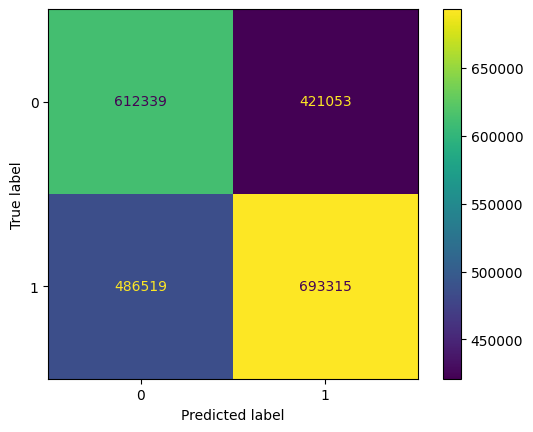



----------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.56      0.59      0.57   1033392
           1       0.62      0.59      0.60   1179834

    accuracy                           0.59   2213226
   macro avg       0.59      0.59      0.59   2213226
weighted avg       0.59      0.59      0.59   2213226



----------------------------


Accuracy Score


Test Accuracy of LogisticRegression()  : 58.989999999999995


----------------------------


Cross Validation Score


Cross-Validation Accuracy Scores:  59.0


(0.5899, 0.59)

In [ ]:
# @title
ML(LR)

Logistic Regression model doesnt work very well with this data, let us use Decision Tree

### Model 2 : Decision Tree

In [ ]:
# fit model on training data
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

Train Score: 1.0
Test Score: 0.6374509426511346


----------------------------


Confusion Matrix




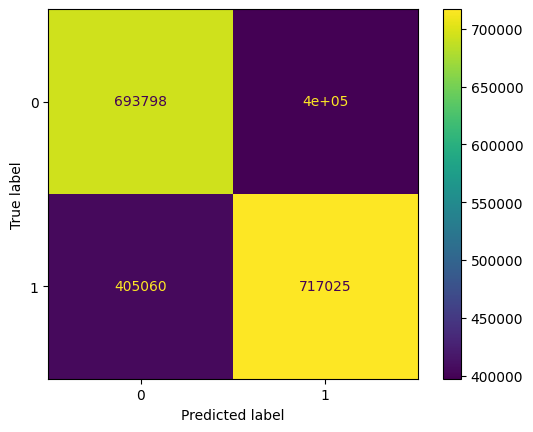



----------------------------


Classification Report


              precision    recall  f1-score   support

           0       0.63      0.64      0.63   1091141
           1       0.64      0.64      0.64   1122085

    accuracy                           0.64   2213226
   macro avg       0.64      0.64      0.64   2213226
weighted avg       0.64      0.64      0.64   2213226



----------------------------


Accuracy Score


Test Accuracy of DecisionTreeClassifier()  : 63.74999999999999


----------------------------


Cross Validation Score


Cross-Validation Accuracy Scores:  61.27


(0.6375, 0.6127)

In [ ]:
ML(decision_tree)

#### Let us predict test values using Decision Tree model

In [ ]:
test.head(3)

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist


In [ ]:
#Combining test dataset with other datasets
df1 = pd.merge(test,songs,on='song_id', how='left')
df2 = pd.merge(df1,song_info,on='song_id', how='left')
test_df =  pd.merge(df2,members,on='msno', how='left')
del df1,df2

In [ ]:
test_df.shape

(2556790, 20)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      int64  
 1   msno                    object 
 2   song_id                 object 
 3   source_system_tab       object 
 4   source_screen_name      object 
 5   source_type             object 
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  name                    object 
 13  isrc                    object 
 14  city                    int64  
 15  bd                      int64  
 16  gender                  object 
 17  registered_via          int64  
 18  registration_init_time  int64  
 19  expiration_date         int64  
dtypes: float64(2), int64(6), object(12)
memory usage: 390.1+ MB


In [ ]:
#Checking for missing values
test_df.isnull().sum()

id                              0
msno                            0
song_id                         0
source_system_tab            8442
source_screen_name         162883
source_type                  7297
song_length                    25
genre_ids                   42110
artist_name                    25
composer                   619304
lyricist                  1224747
language                       42
name                          778
isrc                       196643
city                            0
bd                              0
gender                    1052224
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

In [ ]:
#Let us replace the null values as we did on our train dataset

#Replacing missing values in non-numeric columns with 'unknown'
cols_obj = test_df.select_dtypes(include="object").columns
test_df[cols_obj] = test_df[cols_obj].fillna(value='unknown')

#Replacing missing values in numeric columns with respective median
cols_num = test_df.select_dtypes(include="number").columns
for col in cols_num:
    test_df[col] = test_df[col].fillna(value = test_df[col].median())

In [ ]:
#Rechecking for missing data
test_df.isnull().sum()

id                        0
msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
name                      0
isrc                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

##### Extracting date

In [ ]:
#Converting date columns to datetime format and extracting details
test_df['registration_init_time'] = pd.to_datetime(test_df['registration_init_time'], format = "%Y%m%d")

test_df['registration_init_year'] = test_df['registration_init_time'].dt.year
test_df['registration_init_month'] = test_df['registration_init_time'].dt.month
test_df['registration_init_date'] = test_df['registration_init_time'].dt.day


test_df['expiration_date'] = pd.to_datetime(test_df['expiration_date'], format = "%Y%m%d")

test_df['expiration_date_year'] = test_df['expiration_date'].dt.year
test_df['expiration_date_month'] = test_df['expiration_date'].dt.month
test_df['expiration_date_date'] = test_df['expiration_date'].dt.day

In [ ]:
#Dropping registration_init_time and expiration_date column as features have been extracted and also dropping id column
test_df.drop(['registration_init_time', 'expiration_date','id'], axis=1, inplace=True)

In [ ]:
#Label encoding
cols_cat= test_df.select_dtypes(include='object').columns
test_df[cols_cat] = test_df[cols_cat].apply(le.fit_transform)

In [ ]:
test_df.head(3)

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,...,city,bd,gender,registered_via,registration_init_year,registration_init_month,registration_init_date,expiration_date_year,expiration_date_month,expiration_date_date
0,12934,122191,3,8,3,224130.0,300,24890,33218,16357,...,1,0,2,7,2016,2,19,2017,9,18
1,12934,217907,3,8,3,320470.0,306,24743,47677,18458,...,1,0,2,7,2016,2,19,2017,9,18
2,712,37385,0,22,9,315899.0,158,21878,43194,15871,...,1,0,2,4,2016,11,17,2016,11,24


In [ ]:
#Scaling test data columns
test_scaled = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)

##### Our test data is now ready for prediction

In [ ]:
Y = decision_tree.predict(test_scaled)

In [ ]:
Y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
#Cross Validation Score
Cross_val= round((cross_val_score(decision_tree, test_scaled,Y, cv=5).mean()),4)
print("Cross-Validation Accuracy Scores : ",Cross_val*100)

#### Our Predictions

In [ ]:
#converting our predictions to dataframe
df_Y = pd.DataFrame(Y, columns= ['target'])
df_Y

# Model 3 : Gradient Boosting

In [19]:
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

# Setting SEED for reproducibility
SEED = 23

# # Importing the dataset
# X, y = load_digits(return_X_y=True)

# # Splitting dataset
# train_X, test_X, train_y, test_y = train_test_split(X, y,
# 													test_size = 0.25,
# 													random_state = SEED)

# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=100, #try 300
								learning_rate=0.05,
								random_state=100,
								max_features=5 )
# Fit to training set
gbc.fit(train_X, train_y)

# Predict on test set
pred_y = gbc.predict(test_X)

# accuracy
acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))


Gradient Boosting Classifier accuracy is : 0.63


Train Score: 0.626971460394966 \
Test Score: 0.6274930802367223

In [ ]:
!pip install mlxtend
import joblib

In [45]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


clf = HistGradientBoostingClassifier()
clf.fit(train_X, train_y)

preds = clf.predict(test_X)
prec, rec, _ = precision_recall_curve(test_y, preds, pos_label=1)

print('AUC SCORE: ', auc(rec, prec))

AUC SCORE:  0.7380530831941812


In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, #try 300
								learning_rate=0.05,
								random_state=100,
								max_features=5 )
clf.fit(train_X, train_y)

preds = clf.predict(test_X)
prec, rec, _ = precision_recall_curve(test_y, preds, pos_label=1)

print('AUC SCORE: ', auc(rec, prec))

In [ ]:
clf = HistGradientBoostingClassifier(n_estimators=200, #try 300
								learning_rate=0.05,
								random_state=100,
								max_features=5 )
clf.fit(train_X, train_y)

preds = clf.predict(test_X)
prec, rec, _ = precision_recall_curve(test_y, preds, pos_label=1)

print('AUC SCORE: ', auc(rec, prec))